<h1>Projet 6 - Classifiez automatiquement des biens de consommation<span class="tocSkip"></span></h1>

# 📚 <span style='color:#0D2BA5'>**Mission - Classifiez automatiquement des biens de consommation**</span>
### <span style='color:#0D2BA5'>**Partie 02: Classification des images**

# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'> 1.Préparation des données </a>
   - <a href="#C2"><font color='RoyalBlue'>**1.1 Création d'un Dataset d'Image**</a>
   - <a href="#C3"><font color='RoyalBlue'>**1.2 Pré-traitement des images**</a>
   - <a href="#C4"><font color='RoyalBlue'>**1.3 Afficher des échantillons d'images par catégorie**</a>
   - <a href="#C5"><font color='RoyalBlue'>**1.4 Détermination et affichage des descripteurs SIFT**</a>
   
******    
### <a href="#C6"><font color='DodgerBlue'>2. SIFT </a>
******    
   - <a href="#C7"><font color='RoyalBlue'>**2.1 Extraction des descripteurs sur une image**</a>
   - <a href="#C8"><font color='RoyalBlue'>**2.2 Création des clusters de descripteurs**</a>
   - <a href="#C9"><font color='RoyalBlue'>**2.3 Création des features des images**</a>
   - <a href="#C10"><font color='RoyalBlue'>**2.4 Réduction de dimension: PCA / T-SNE**</a>
   - <a href="#C11"><font color='RoyalBlue'>**2.5 Affichage T-SNE par catégorie d'Image Réelle**</a>
   - <a href="#C12"><font color='RoyalBlue'>**2.6 K-Means sur les 2 Composantes T-SNE**</a>
   - <a href="#C13"><font color='RoyalBlue'>**2.7 ARI score**</a>
   
******
### <a href="#C14"><font color='DodgerBlue'>3. Apprentissage par Transfert avec les CNN : Faisabilité</a>
******
   - <a href="#C15"><font color='RoyalBlue'>**3.1 Création du modèle d'étude avec VGG16**</a>
   - <a href="#C16"><font color='RoyalBlue'>**3.2 Création des features d'images**</a>
   - <a href="#C17"><font color='RoyalBlue'>**3.3 Réduction de dimentionnalité : PCA / T-SNE**</a>
   - <a href="#C18"><font color='RoyalBlue'>**3.4 Affichage T-SNE par catégorie d'image réelle**</a>
   - <a href="#C19"><font color='RoyalBlue'>**3.5 K-Means sur les 2 Composantes T-SNE**</a>
   - <a href="#C20"><font color='RoyalBlue'>**3.6 ARI score**</a>
******
### <a href="#C21"><font color='DodgerBlue'>4. Classification supervisée d'images en utilisant l'apprentissage par transfert avec CNN</a>
******
   - <a href="#C22"><font color='RoyalBlue'>**4.1 Fonctions de création de modèles de classification**</a>
   - <a href="#C23"><font color='RoyalBlue'>**4.2 Préparation des images et du dataset**</a>
   - <a href="#C24"><font color='RoyalBlue'>**4.3 Création du modèle**</a>  
   - <a href="#C25"><font color='RoyalBlue'>**4.4 Scores**</a>
   - <a href="#C26"><font color='RoyalBlue'>**4.5 L'analyse de classe**</a>  
   - <a href="#C27"><font color='RoyalBlue'>**4.6 ImageDataGenerator avec augmentation de données (modèle VGG16)**</a>  
   - <a href="#C28"><font color='RoyalBlue'>**4.7 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle VGG16)**</a>
   - <a href="#C29"><font color='RoyalBlue'>**4.8 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle VGG19)**</a>
   - <a href="#C30"><font color='RoyalBlue'>**4.9 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle ResNet50)**</a>  

<figure><a class="oc-imageLink oc-imageLink--disabled custom-link" href="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png"><a href="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png" class="oc-imageLink oc-imageLink--disabled"><img src="https://user.oc-static.com/upload/2019/02/24/15510259240381_Projet%20textimage%20logo.png" alt="logo entreprise place de marché"></a></a></figure>

# <a name="C1"><font color='RoyalBlue'> 1. Préparation des données</a>

In [5]:
import os
import shutil


import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread

import seaborn as sns
import plotly.express as px

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import manifold, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import cv2
import cv2 as cv

from sklearn import preprocessing
from sklearn import cluster, decomposition, manifold, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import  KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import manifold, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import time

import keras
from keras.preprocessing import image
from keras.models import Model
from PIL import Image, ImageOps ,ImageFilter

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# Chargement du jeu de données
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df_category = pd.read_csv('df_category.csv')
df_category

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56+00:00   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56+00:00   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56+00:00   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52+00:00   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52+00:00   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43+00:00   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43+00:00   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43+00:00   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43+00:00   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43+00:00   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

### <a name="C2"><font color='DodgerBlue'> 1.1 Création d'un Dataset d'Image</a>

In [8]:
# Ajout variable image_loc
path = "./image/"
df_category['image_loc'] = [os.path.join(path, row) for row in df_category['image']]
df_category['image_loc']

0       ./image/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       ./image/7b72c92c2f6c40268628ec5f14c6d590.jpg
2       ./image/64d5d4a258243731dc7bbb1eef49ad74.jpg
3       ./image/d4684dcdc759dd9cdf41504698d737d8.jpg
4       ./image/6325b6870c54cd47be6ebfbffa620ec7.jpg
                            ...                     
1045    ./image/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    ./image/fd6cbcc22efb6b761bd564c28928483c.jpg
1047    ./image/5912e037d12774bb73a2048f35a00009.jpg
1048    ./image/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    ./image/f2f027ad6a6df617c9f125173da71e44.jpg
Name: image_loc, Length: 1050, dtype: object

In [9]:
df_img = df_category.copy()
df_img= df_img[['image', 'image_loc', 'main_category']]
df_img.head(3)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                      image_loc    main_category  
0  ./image/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing  
1  ./image/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care  
2  ./image/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care

In [10]:
df_image_par_cat = df_img.groupby('main_category').agg({'image' : 'count'})
df_image_par_cat

image
main_category                   
Baby Care                    150
Beauty and Personal Care     150
Computers                    150
Home Decor  Festive Needs    150
Home Furnishing              150
Kitchen  Dining              150
Watches                      150

Home Furnishing


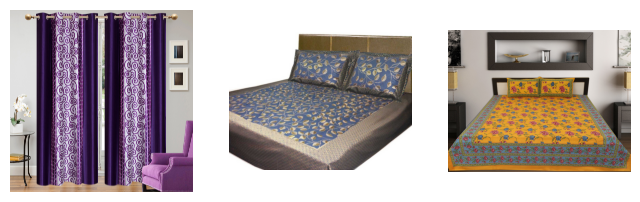

Baby Care


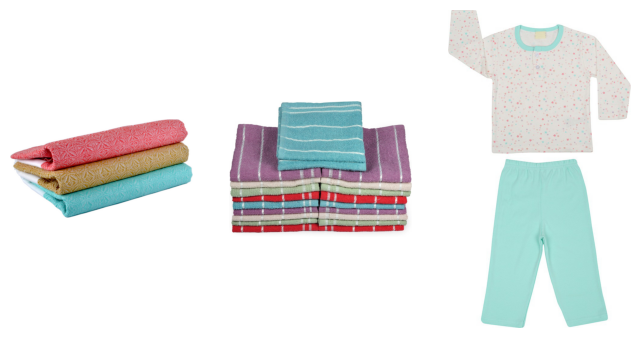

Watches


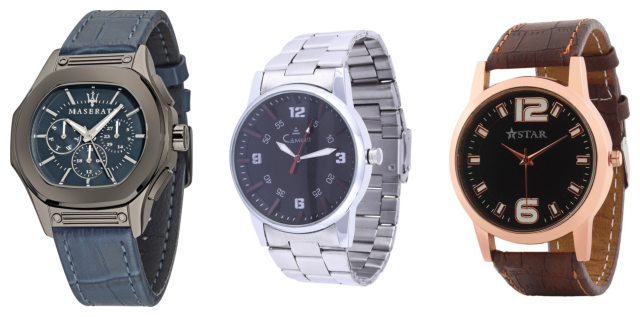

Home Decor  Festive Needs


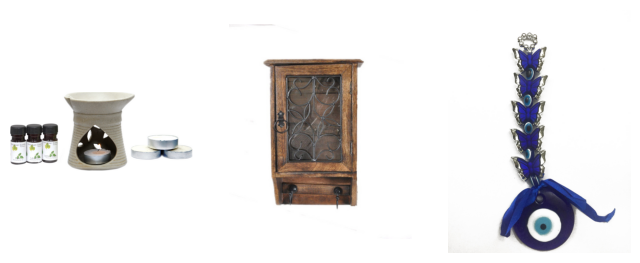

Kitchen  Dining


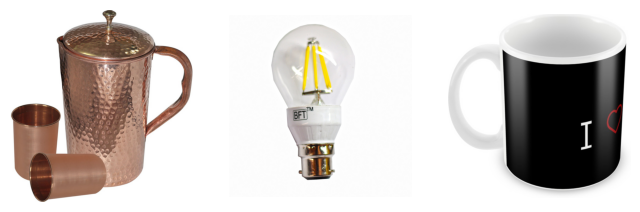

Beauty and Personal Care


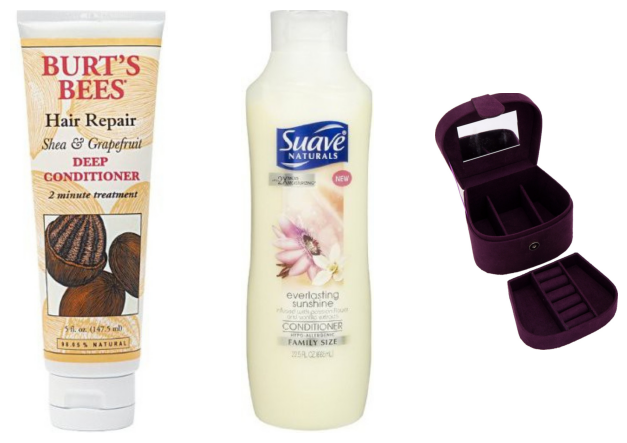

Computers


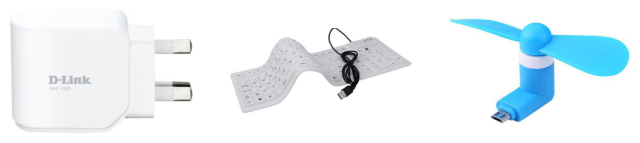

In [11]:
# Affichage des images 

for j, categ in enumerate(df_img["main_category"].unique()):
    bolded_string = "\033[1m" + categ + "\033[0m"
    print(bolded_string)
    for i in range(3):
        name_image = df_img[df_img["main_category"] == categ]["image"].iloc[i]
        filename = path + name_image
        plt.subplot(130 + 1 + i)
        if os.path.exists(filename):
            img = imread(filename)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"Image {filename} not found, skipping.")
    plt.show()


In [12]:
# Déscription des images 

# Largeur des images
df_img['Largeur_img'] = [Image.open(row).size[0] for row in df_img['image_loc']]
# Hauteur des images
df_img['Hauteur_img'] = [Image.open(row).size[1] for row in df_img['image_loc']]
# Taille des images
df_img['Taille_img'] = [(Image.open(row).size[0] * Image.open(row).size[1])
                      for row in df_img['image_loc']]
# Format des images
df_img['Format_img'] = [Image.open(row).mode for row in df_img['image_loc']]
df_img.head(3)

C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                      image_loc    main_category  Largeur_img  \
0  ./image/55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing         3600   
1  ./image/7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care         2388   
2  ./image/64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care          982   

   Hauteur_img  Taille_img Format_img  
0         3600    12960000        RGB  
1         1293     3087684        RGB  
2          729      715878        RGB

### <a name="C3"><font color='DodgerBlue'> 1.2 Pré-traitement des images</a>

**On crée un répertoire pour chaque catégorie où on retrouvera les images triées par catégorie et séparées en train (90%) / test (10%)**

**On crée 2 datasets train/test pour les images en les renommant par catégorie et en ajoutant un label**

In [16]:
# Chemins des répertoires
train_dir = 'Datacat/train/'
test_dir = 'Datacat/test/'

def collect_images_and_labels(directory):
    image_paths = []
    labels = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for image in os.listdir(category_path):
                image_paths.append(os.path.join(category_path, image))
                labels.append(category)
    return image_paths, labels

# Collecter les images et leurs étiquettes des répertoires d'entraînement et de test
train_image_paths, train_labels = collect_images_and_labels(train_dir)
test_image_paths, test_labels = collect_images_and_labels(test_dir)

# Créer des DataFrame pour l'entraînement et le test
train_data = pd.DataFrame({'image_path': train_image_paths, 'label_name': train_labels})
test_data = pd.DataFrame({'image_path': test_image_paths, 'label_name': test_labels})

# Encoder les étiquettes
le = preprocessing.LabelEncoder()
train_data["label"] = le.fit_transform(train_data["label_name"])
test_data["label"] = le.transform(test_data["label_name"])

# Afficher les premières lignes des DataFrame
train_data.sample(10)

image_path  \
166  Datacat/train/Beauty and Personal Care\Beauty ...   
321            Datacat/train/Computers\Computers23.jpg   
181  Datacat/train/Beauty and Personal Care\Beauty ...   
736  Datacat/train/Kitchen  Dining\Kitchen  Dining3...   
516  Datacat/train/Home Decor  Festive Needs\Home D...   
120            Datacat/train/Baby Care\Baby Care86.jpg   
457  Datacat/train/Home Decor  Festive Needs\Home D...   
269  Datacat/train/Beauty and Personal Care\Beauty ...   
409  Datacat/train/Home Decor  Festive Needs\Home D...   
217  Datacat/train/Beauty and Personal Care\Beauty ...   

                    label_name  label  
166   Beauty and Personal Care      1  
321                  Computers      2  
181   Beauty and Personal Care      1  
736            Kitchen  Dining      5  
516  Home Decor  Festive Needs      3  
120                  Baby Care      0  
457  Home Decor  Festive Needs      3  
269   Beauty and Personal Care      1  
409  Home Decor  Festive Needs      3  
217   Beauty and Personal Care      1

In [17]:
test_data.sample(5)

image_path  \
76   Datacat/test/Kitchen  Dining\Kitchen  Dining13...   
12             Datacat/test/Baby Care\Baby Care147.jpg   
2              Datacat/test/Baby Care\Baby Care137.jpg   
100                Datacat/test/Watches\Watches145.jpg   
51   Datacat/test/Home Decor  Festive Needs\Home De...   

                    label_name  label  
76             Kitchen  Dining      5  
12                   Baby Care      0  
2                    Baby Care      0  
100                    Watches      6  
51   Home Decor  Festive Needs      3

In [18]:
train_data.groupby("label_name").count()

image_path  label
label_name                                  
Baby Care                         135    135
Beauty and Personal Care          135    135
Computers                         135    135
Home Decor  Festive Needs         135    135
Home Furnishing                   136    136
Kitchen  Dining                   135    135
Watches                           135    135

### <a name="C4"><font color='DodgerBlue'> 1.3 Afficher des échantillons d'images par catégorie</a>

Baby Care


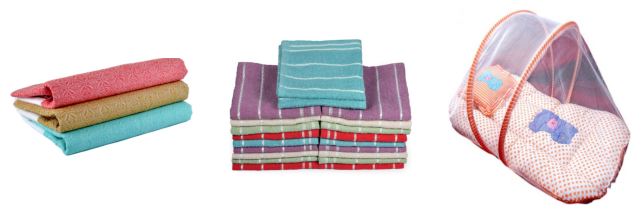

Beauty and Personal Care


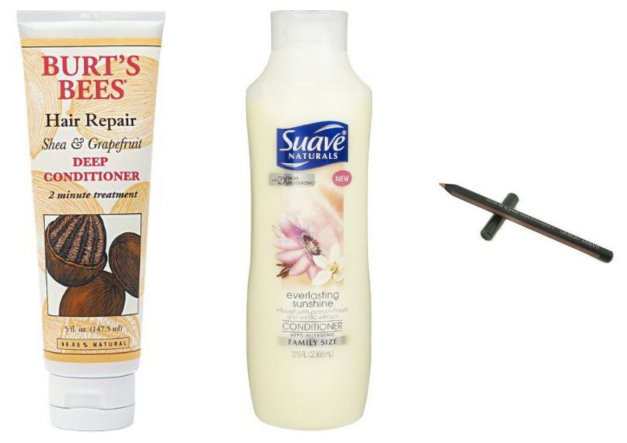

Computers


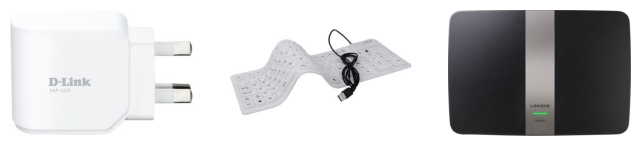

Home Decor  Festive Needs


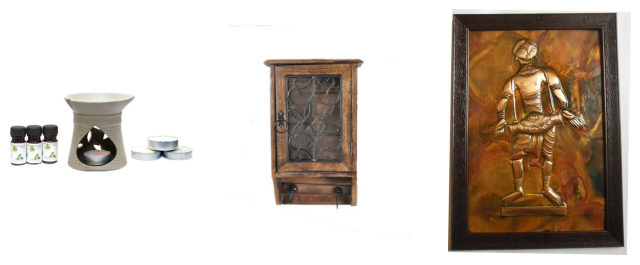

Home Furnishing


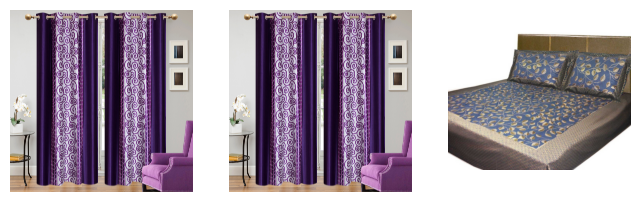

Kitchen  Dining


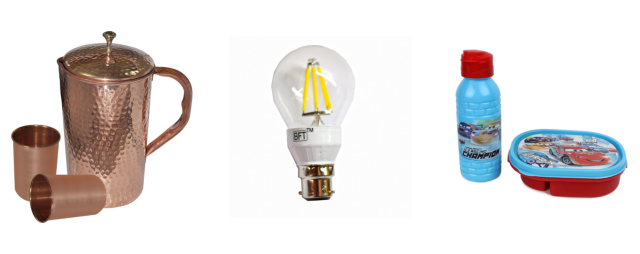

Watches


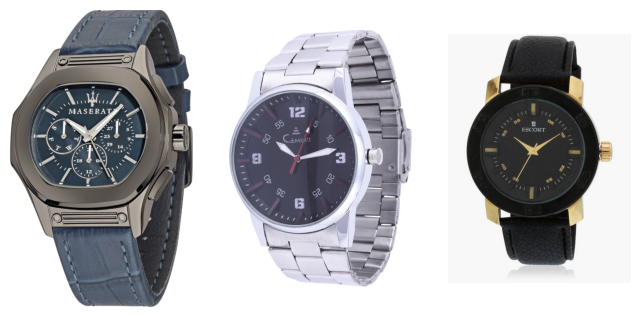

In [20]:
# Fonction pour lister les images par catégorie
def list_fct(name, data):
    return [data["image_path"][i] for i in range(len(data)) if data["label_name"][i] == name]

# Catégories
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor  Festive Needs", "Home Furnishing", "Kitchen  Dining", "Watches"]

# Afficher quelques images de chaque catégorie
for name in list_labels:
    print(name)
    image_paths = list_fct(name, train_data) 
    for i in range(min(3, len(image_paths))):  # Affiche jusqu'à 3 images de la catégorie
        plt.subplot(130 + 1 + i)
        image = imread(image_paths[i])
        plt.imshow(image)
        plt.axis('off')  # Pour masquer les axes
    plt.show()

# <a name="C5"><font color='DodgerBlue'> 1.4 Détermination et affichage des descripteurs SIFT</a>

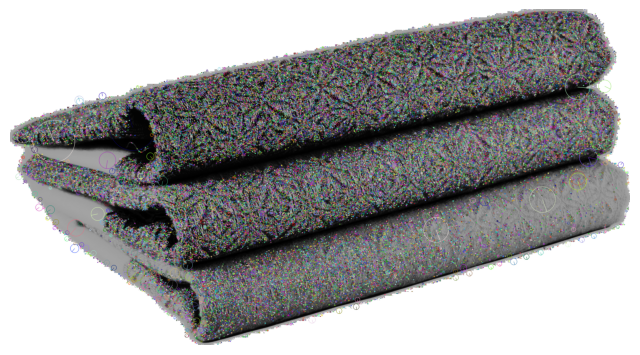

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [22]:
if len(train_data) > 0:
    image_path = train_data["image_path"][0]  # Choisir une image de l'ensemble d'entraînement

    # Charger l'image en niveaux de gris
    image = cv2.imread(image_path, 0)

    # Égaliser l'histogramme de l'image 
    image = cv2.equalizeHist(image)

    # Créer un objet SIFT
    sift = cv2.SIFT_create()

    # Détecter les points clés et calculer les descripteurs
    kp, des = sift.detectAndCompute(image, None)

    # Dessiner les points clés sur l'image
    img = cv2.drawKeypoints(image, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Convertir l'image en format RGB pour l'affichage avec matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Afficher l'image
    plt.imshow(img_rgb)
    plt.axis('off')  # Pour masquer les axes
    plt.show()

    # Afficher les informations sur les descripteurs
    if des is not None:
        print("Descripteurs : ", des.shape)
        print()
        print(des)
    else:
        print("Aucun descripteur trouvé.")
else:
    print("Aucune image trouvée dans le DataFrame.")

- L'image contient 47651 descripteurs
- Chaque descripteur est un vecteur de longueur 128

# <a name="C6"><font color='RoyalBlue'> 2. SIFT</a>

### <a name="C7"><font color='DodgerBlue'> 2.1 Extraction des descripteurs sur une image</a>

In [26]:
# Initialisation de SIFT
sift = cv2.SIFT_create(500)
sift_keypoints = []

# Mesurer le temps de traitement
temps1 = time.time()

# Parcourir le DataFrame
for idx in range(len(train_data)): 
    if idx % 100 == 0: 
        print(idx)

    image_path = train_data['image_path'][idx]
    image = cv2.imread(image_path, 0)  # Charger en niveaux de gris

    # Égaliser l'histogramme de l'image
    res = cv2.equalizeHist(image)

    # Détecter les points clés et calculer les descripteurs
    kp, des = sift.detectAndCompute(res, None)
    if des is not None:
        sift_keypoints.append(des)


sift_keypoints_by_img = [des for des in sift_keypoints if des is not None]
# Concaténer tous les descripteurs en un seul tableau
sift_keypoints_all = np.concatenate(sift_keypoints, axis=0)

# Afficher les résultats
print("\nNombre de descripteurs : ", sift_keypoints_all.shape)

# Calculer la durée du traitement
duration1 = time.time() - temps1
print("Temps de traitement SIFT descriptor : ", "{:.2f}".format(duration1), "secondes")

0
100
200
300
400
500
600
700
800
900

Nombre de descripteurs :  (465914, 128)
Temps de traitement SIFT descriptor :  175.64 secondes


### <a name="C8"><font color='DodgerBlue'> 2.2 Création des clusters de descripteurs</a>

**Nous utilisons MiniBatchKMeans pour obtenir des temps de traitement plus courts et raisonnables.**

In [29]:
# clustering K-Means sur l'ensemble des descripteurs SIFT
if 'sift_keypoints_all' in locals() and len(sift_keypoints_all) > 0:

    # Démarrer le chronomètre pour mesurer le temps de traitement
    temps1 = time.time()

    # Estimer le nombre de clusters
    k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
    print("Nombre de clusters estimés : ", k)
    print("Création de", k, "clusters de descripteurs ...")

    # Effectuer le clustering
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
    kmeans.fit(sift_keypoints_all)

    # Calculer la durée du traitement
    duration1 = time.time() - temps1
    print("Temps de traitement KMeans : ", "{:.2f}".format(duration1), "secondes")
else:
    print("Aucun descripteur SIFT n'a été trouvé. Veuillez d'abord exécuter le script de génération des descripteurs SIFT.")


Nombre de clusters estimés :  683
Création de 683 clusters de descripteurs ...


C:\Users\samir\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Temps de traitement KMeans :  12.21 secondes


### <a name="C9"><font color='DodgerBlue'> 2.3 Création des features des images</a>

Pour chaque image :

- prédiction des numéros de cluster de chaque descripteur
- création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image
- Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [32]:
# Fonction pour construire un histogramme à partir des descripteurs
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0: 
        print("Problème histogramme image : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist

# Mesurer le temps de traitement
temps1 = time.time()

# Création d'un tableau pour les vecteurs d'histogrammes
hist_vectors = []

# Parcourir chaque ensemble de descripteurs d'image
for i, image_desc in enumerate(sift_keypoints_by_img):
    if i % 100 == 0: 
        print(i)
    if image_desc is not None:
        hist = build_histogram(kmeans, image_desc, i)  # Calcule l'histogramme
        hist_vectors.append(hist)  # L'histogramme est le vecteur de caractéristiques

# Conversion en un tableau NumPy
im_features = np.asarray(hist_vectors)

# Calculer la durée de la création des histogrammes
duration1 = time.time() - temps1
print("Temps de création des histogrammes : ", "{:.2f}".format(duration1), "secondes")


0
100
200
300
400
500
600
700
800
900
Temps de création des histogrammes :  29.09 secondes


### <a name="C10"><font color='DodgerBlue'> 2.4 Réduction de dimension: PCA / T-SNE</a>

In [34]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (946, 683)
Dimensions dataset après réduction PCA :  (946, 460)


In [35]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = train_data["label_name"]
print(df_tsne.shape)

(946, 3)


In [36]:
df_tsne

tsne1      tsne2      class
0    -4.816604 -16.731581  Baby Care
1   -20.025427 -13.659522  Baby Care
2     3.762851 -34.377003  Baby Care
3     0.892497  21.476183  Baby Care
4   -10.397252   5.807980  Baby Care
..         ...        ...        ...
941 -26.550394  -9.039006    Watches
942 -28.191103 -10.127243    Watches
943  19.091152  24.444035    Watches
944  -5.253792   4.746761    Watches
945 -27.242628  -0.814443    Watches

[946 rows x 3 columns]

### <a name="C11"><font color='DodgerBlue'> 2.5 Affichage T-SNE par Catégorie d'Image Réelle</a>

C:\Users\samir\AppData\Local\Temp\ipykernel_7596\2435026682.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


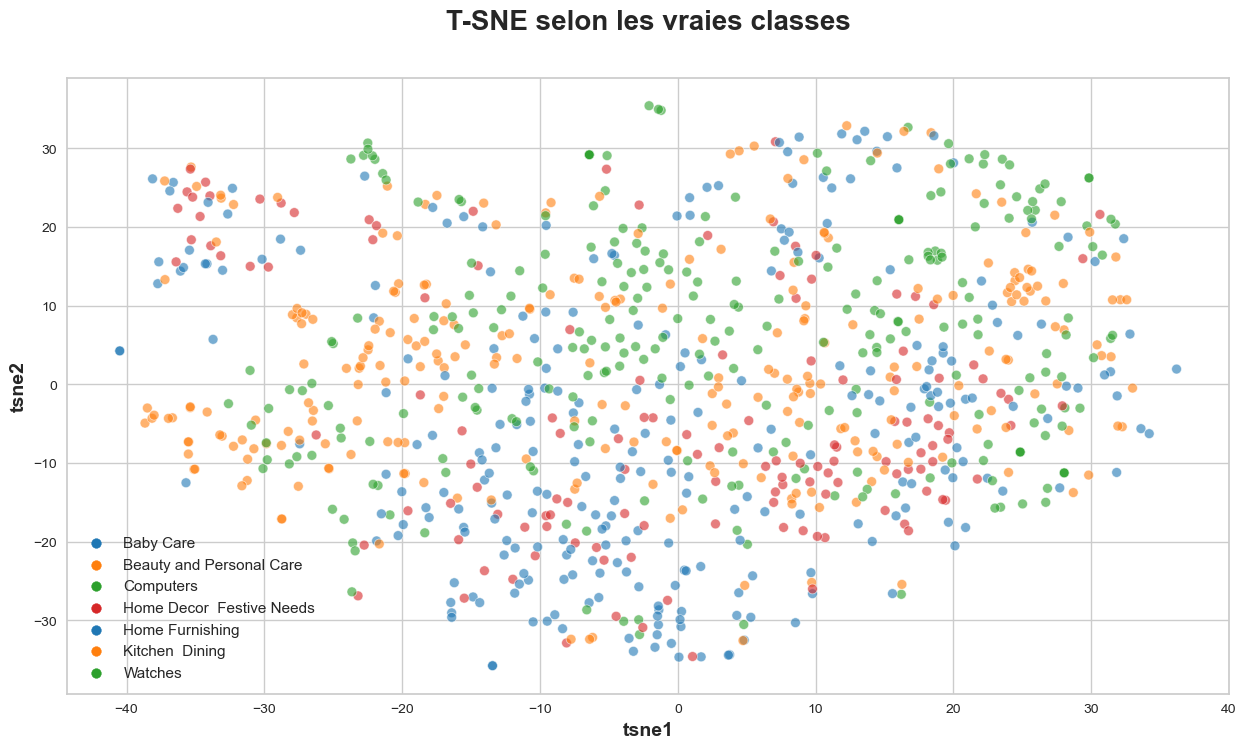

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('T-SNE selon les vraies classes', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 11}) 

plt.show()

### <a name="C12"><font color='DodgerBlue'> 2.6 K-Means sur les 2 Composantes T-SNE</a>

In [40]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

C:\Users\samir\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


(946, 4)


C:\Users\samir\AppData\Local\Temp\ipykernel_7596\2994307256.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


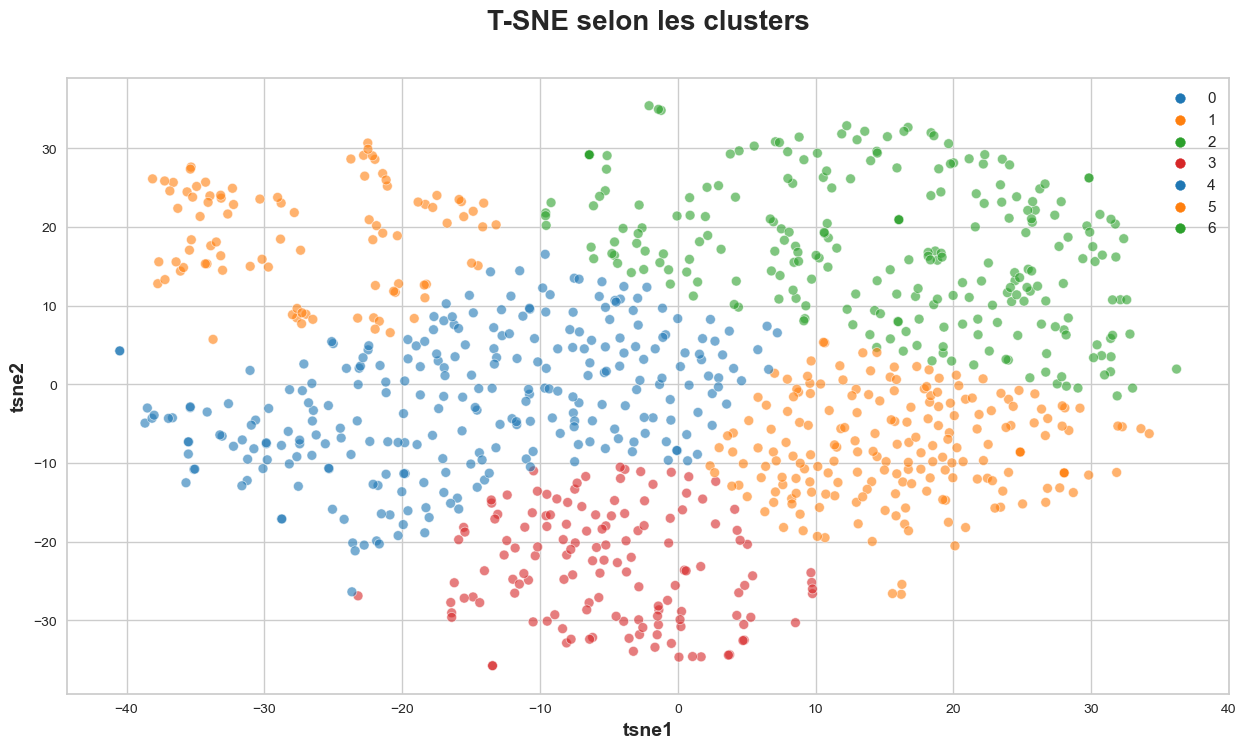

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('T-SNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 11}) 

plt.show()

### <a name="C13"><font color='DodgerBlue'> 2.7 ARI score</a>

In [43]:
labels = train_data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.05845037821150792


# <a name="C14"><font color='RoyalBlue'> 3. Apprentissage par Transfert avec les CNN : Faisabilité</a>

Nous allons dans cette partie utiliser Keras, une bibliothèque de Deep Learning.

Nous utiliserons une version du réseau de neurones convolutif VGG-Net nommé VGG16.

=> Keras nous fourni une version pré-entraînée de VGG16

VGG-16 est une version du réseau de neurones convolutif VGG-Net.

VGG-16 est constitué de plusieurs couches, dont 13 couches de convolution et 3 fully-connected. Il doit donc apprendre les poids de 16 couches.

Il prend en entrée une image en couleurs de taille 224 × 224 px et la classifie dans une des 1000 classes. Il renvoie donc un vecteur de taille 1000, qui contient les probabilités d'appartenance à chacune des classes.

le Transfer Learning consiste à utiliser le modèle VGG16 pré-entraîné sur ImageNet (ImageNet est un projet de recherche visant à développer une grande base de données d'images avec des annotations, c'est-à-dire des images et leurs descriptions).

**3 étapes à suivre**

- **ÉTAPE 1*** - Chargement des images, extraction des features (Prétraiter chaque image selon l'entrée acceptée par le modèle d'apprentissage par transfert et convertir chaque image en vecteur respectif en utilisant les poids du modèle d'apprentissage par transfert. Ensuite, aplatissez et stockez tous les poids des images dans une liste.)

- **ÉTAPE 2** - Réduction de dimension

- **ÉTAPE 3** - Clustering

### <a name="C15"><font color='DodgerBlue'> 3.1 Création du modèle d'étude avec VGG16</a>

In [47]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


### <a name="C16"><font color='DodgerBlue'> 3.2 Création des features d'images</a>

In [49]:
images_features = []
i = 0

for image_file in train_data["image_path"]: 
    if i % 100 == 0: 
        print(i)
    i += 1

    # Charger et prétraiter l'image
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    # Prédire les caractéristiques de l'image avec le modèle
    features = model.predict(image, verbose=0)[0]
    images_features.append(features)

# Convertir en un tableau NumPy
images_features = np.asarray(images_features)

# Afficher la forme du tableau de caractéristiques
print(images_features.shape)

0
100
200
300
400
500
600
700


C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


800
900
(946, 4096)


### <a name="C17"><font color='DodgerBlue'> 3.3 Réduction de dimentionnalité : PCA / T-SNE</a>

In [51]:
print("Dimensions dataset avant réduction PCA : ", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (946, 4096)
Dimensions dataset après réduction PCA :  (946, 728)


In [52]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = train_data["label_name"]
print(df_tsne.shape)

(946, 3)


In [53]:
df_tsne

tsne1      tsne2      class
0    -2.071952 -25.350931  Baby Care
1    -5.543946 -21.792124  Baby Care
2    -0.638192 -17.301334  Baby Care
3    -9.301209 -17.996321  Baby Care
4    -7.484634 -19.827797  Baby Care
..         ...        ...        ...
941  37.277405   4.043986    Watches
942  19.743464   5.601748    Watches
943  32.300640   0.953756    Watches
944  28.966408   7.803380    Watches
945  39.206573   3.096013    Watches

[946 rows x 3 columns]

### <a name="C18"><font color='DodgerBlue'> 3.4 Affichage T-SNE par catégorie d'image réelle</a>

C:\Users\samir\AppData\Local\Temp\ipykernel_7596\2435026682.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


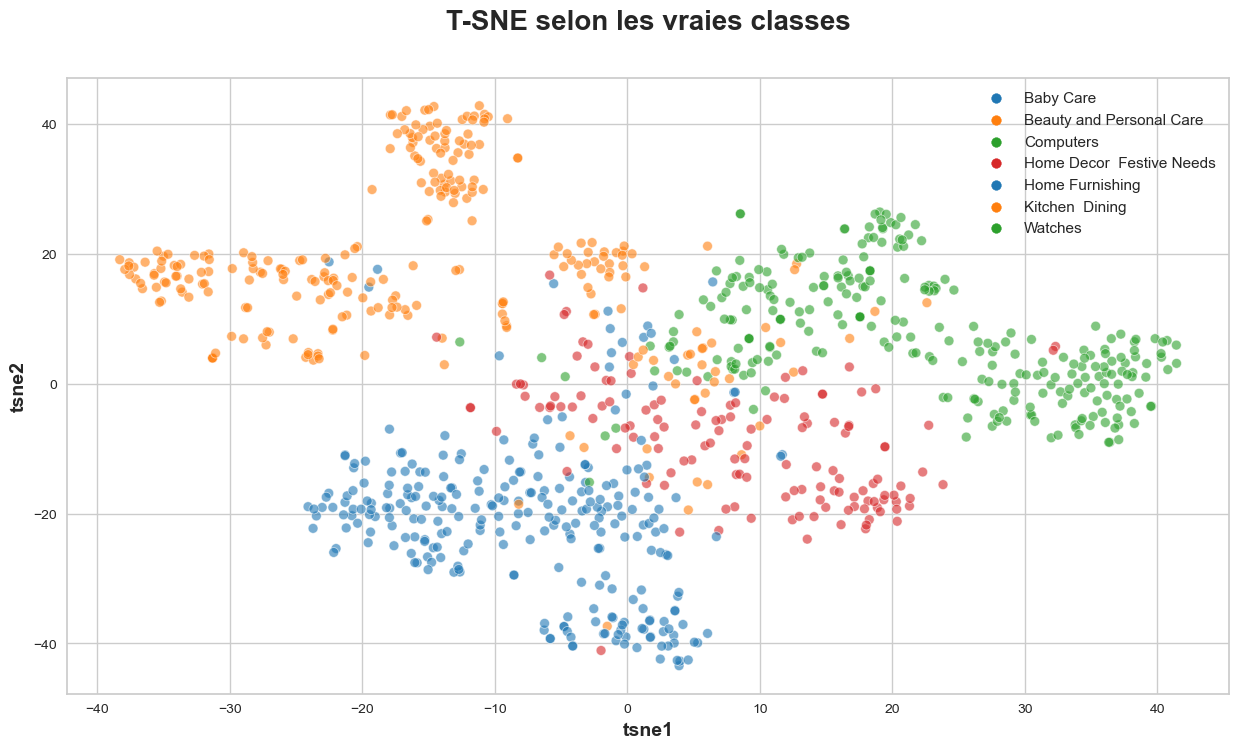

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('T-SNE selon les vraies classes', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 11}) 

plt.show()

### <a name="C19"><font color='DodgerBlue'> 3.5 K-Means sur les 2 Composantes T-SNE</a>

In [57]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

C:\Users\samir\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


(946, 4)


C:\Users\samir\AppData\Local\Temp\ipykernel_7596\2994307256.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


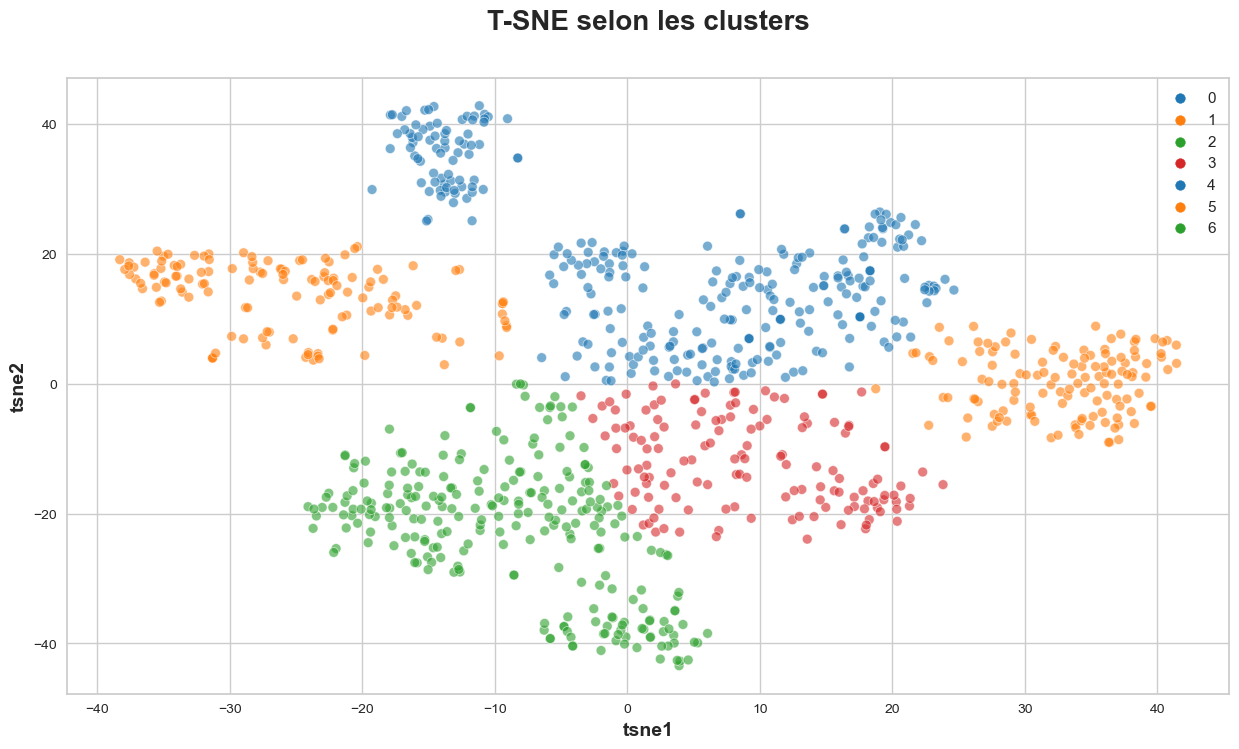

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('T-SNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 14, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 14, fontweight = 'bold')
plt.legend(prop={'size': 11}) 

plt.show()

### <a name="C20"><font color='DodgerBlue'> 3.6 ARI score</a>

In [60]:
labels = train_data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.5223224933289147


# <a name="C21"><font color='RoyalBue'> 4. Classification supervisée d'images en utilisant l'apprentissage par transfert avec CNN</a>

- **Cette section du code explique comment utiliser l'apprentissage par transfert avec un réseau de neurones convolutif (CNN) pré-entraîné pour effectuer une classification supervisée d'images. Nous utiliserons un modèle pré-entraîné VGG16 pour cette tâche.**

- **Nous allons tester différentes approches de classification supervisée avec les CNN Transfer Learning.**

### <a name="C22"><font color='DodgerBlue'> 4.1 Fonctions de création de modèles de classification</a>

In [65]:
def create_VGG16_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [66]:
def create_VGG16_fct2() :
    """"Fonction pour l'approche par data augmentation intégrée au modèle """
    
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model
    

In [67]:
def create_VGG19_fct():
    # Charger le modèle VGG19 pré-entraîné sans les couches supérieures
    model0 = VGG19(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Rendre les couches du modèle pré-entraîné non entraînables
    for layer in model0.layers:
        layer.trainable = False

    # Ajouter des couches personnalisées
    x = model0.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Remplacez 7 par le nombre de classes

    # Créer le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)

    # Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [68]:
def create_ResNet50_fct():
    # Charger le modèle ResNet50 pré-entraîné sans les couches supérieures
    model0 = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Rendre les couches du modèle pré-entraîné non entraînables
    for layer in model0.layers:
        layer.trainable = False

    # Ajouter des couches personnalisées
    x = model0.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Remplacez 7 par le nombre de classes

    # Créer le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)

    # Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

## <span style='background:PowderBlue'>Préparation Initiale des Images pour une Classification Supervisée Simplifiée (modèle VGG16)

**Nous allons ici appliquer une approche simple par préparation initiale de l'ensemble des images avant de procéder à la classification supervisée.**

### <a name="C23"><font color='DodgerBlue'> 4.2 Préparation des images et du dataset</a>

In [72]:
def image_prep_fct(data) :
    prepared_images = []
    for image_num in range(len(data['image_path'])) :
        img = (load_img(
            data['image_path'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np_train = image_prep_fct(train_data)
print(images_np_train.shape)

images_np_test = image_prep_fct(test_data)
print(images_np_test.shape)

C:\Users\samir\anaconda\Lib\site-packages\PIL\Image.py:3186: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(946, 224, 224, 3)
(105, 224, 224, 3)


In [73]:
from keras.utils import to_categorical
#préparation des étiquettes
y = to_categorical(train_data['label'])      # Étiquettes d'entraînement
y_test = to_categorical(test_data['label'])  # Étiquettes de test

In [74]:
#attribuer les caractéristiques aux valeurs correspondantes
X = images_np_train      # Caractéristiques d'entraînement
X_test = images_np_test  # Caractéristiques de test

In [75]:
print(y.shape)      # Affiche la forme des étiquettes d'entraînement
print(y_test.shape) # Affiche la forme des étiquettes de test

(946, 7)
(105, 7)


In [76]:
from sklearn.model_selection import train_test_split
#création d'un ensemble de validation à partir de l'ensemble d'entraînement
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(709, 224, 224, 3)

### <a name="C24"><font color='DodgerBlue'> 4.3 Création du modèle</a>

In [78]:
# Création du modèle
with tf.device('/gpu:0'): 
    model1 = create_VGG16_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.keras"  # Modifier l'extension en .keras
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraîner le modèle
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3702 - loss: 7.7220
Epoch 1: val_loss improved from inf to 1.87718, saving model to ./model1_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.3777 - loss: 7.5429 - val_accuracy: 0.7300 - val_loss: 1.8772
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6867 - loss: 2.1612
Epoch 2: val_loss improved from 1.87718 to 1.30593, saving model to ./model1_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.6879 - loss: 2.1458 - val_accuracy: 0.8017 - val_loss: 1.3059
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7475 - loss: 1.3845
Epoch 3: val_loss did not improve from 1.30593
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.7486 - loss: 1.3789 - val_accuracy: 0.7975 - val_loss: 1.3767
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8121 - loss: 0.9278
Epoch 4: val_loss did not improve from 1.30593
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/st

In [79]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9678 - loss: 0.1032
Epoch 1: val_loss did not improve from 1.09939
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.9679 - loss: 0.1018 - val_accuracy: 0.8608 - val_loss: 1.1639
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9872 - loss: 0.0720
Epoch 2: val_loss did not improve from 1.09939
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.9873 - loss: 0.0709 - val_accuracy: 0.8481 - val_loss: 1.2839
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9856 - loss: 0.0420
Epoch 3: val_loss did not improve from 1.09939
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.9852 - loss: 0.0428 - val_accuracy: 0.8481 - val_loss: 1.2241
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9721 - loss: 0.0879
Epoch 4: val_loss did not improve from 1.09939
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.9728 - loss: 0.0860 - val_accuracy: 0.8523 - val_loss: 1.2928
Epoch 5/50
12/12 ━━━

### <a name="C25"><font color='DodgerBlue'> 4.4 Scores</a>

In [81]:
# Score du dernier epoch
# Évaluer la précision du modèle sur les ensembles d'entraînement et de validation après la dernière époque d'entraînement.
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9980 - loss: 0.0034
Training Accuracy: 0.9986

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8619 - loss: 1.1200
Validation Accuracy:  0.8270


In [82]:
# Score de l'epoch optimal
# Objectif : Charger les poids du modèle sauvegardé au moment de l'epoch avec la meilleure performance et
# évaluer sa précision sur les ensembles de validation et de test.
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8523
Test Accuracy       :  0.5905


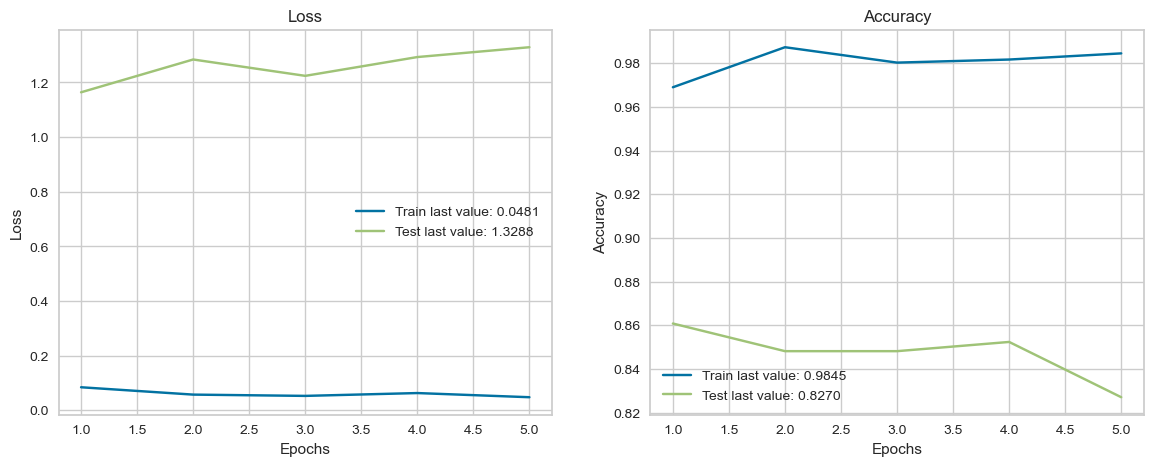

In [83]:
def plot_history(history, path):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label=f'Train last value: {history.history["loss"][-1]:.4f}')
    plt.plot(epochs, history.history['val_loss'], label=f'Test last value: {history.history["val_loss"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label=f'Train last value: {history.history["accuracy"][-1]:.4f}')
    plt.plot(epochs, history.history['val_accuracy'], label=f'Test last value: {history.history["val_accuracy"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.savefig(path)
    plt.show()

# Exemple d'utilisation
plot_history(history1, path="standard.png")
plt.close()


### <a name="C26"><font color='DodgerBlue'> 4.5 L'analyse de classe</a>

- ***L'analyse de classe fournit des informations détaillées sur les performances du modèle pour chaque catégorie. En utilisant un rapport de classification et une matrice de confusion, nous pouvons identifier les classes qui sont bien classées et celles qui posent des problèmes. Cela peut aider à ajuster le modèle ou à améliorer les données pour obtenir de meilleures performances globales.***

In [86]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
[4 3 3 2 2 0 4 1 4 5 6 5 5 3 1 4 6 3 4 5 1 1 2 5 0 1 2 5 0 5 6 5 0 6 0 6 5
 3 4 0 5 6 3 0 3 1 6 5 4 1 2 4 6 0 5 2 2 2 0 4 6 1 5 4 1 1 5 5 5 5 0 2 3 5
 1 1 4 3 6 1 4 2 2 5 0 3 6 1 5 4 2 3 3 4 3 3 3 5 3 3 0 5 3 1 4 5 3 1 5 4 3
 4 0 4 2 2 2 1 4 1 6 0 4 6 3 3 0 4 0 6 2 1 0 2 5 1 3 2 2 2 2 0 2 1 6 5 4 0
 0 4 1 0 6 0 6 6 5 1 3 1 6 3 2 6 1 4 5 6 4 3 4 6 0 4 0 3 6 3 4 2 1 3 6 5 2
 4 6 0 1 6 5 1 2 0 3 3 6 2 0 6 3 1 2 6 1 0 6 5 3 0 1 3 2 2 2 6 6 1 4 4 2 1
 6 0 5 0 4 5 2 5 0 0 4 1 2 0 4]

[2 3 3 2 2 0 4 1 4 5 6 5 1 3 1 4 6 3 4 5 1 1 2 5 0 1 2 5 0 5 6 5 0 6 0 6 5
 5 4 0 5 6 3 0 4 1 6 5 4 1 2 4 6 0 5 2 2 5 0 4 6 3 5 4 2 1 5 5 5 5 0 2 3 5
 1 0 4 3 6 1 4 2 2 5 0 3 6 1 5 4 2 6 3 4 3 3 3 5 3 3 0 1 3 1 4 5 3 1 5 3 3
 0 0 4 0 2 2 1 4 1 6 0 4 6 3 6 0 0 0 2 6 1 4 1 5 1 3 2 2 2 1 3 2 1 6 5 4 4
 0 4 1 0 6 0 6 6 5 1 0 1 6 3 2 6 1 4 5 6 4 3 4 6 0 4 0 3 6 3 0 2 1 4 6 5 2
 4 6 0 1 6 5 1 2 0 3 4 6 2 4 6 3 1 2 6 1 0 6 5 3 4 1 6 1 3 2 6 6 1 0 4 2 1
 6 0 5 0 4 5 2 1 0 5 4 2 2 0 4

In [87]:
def calculate_confusion_matrix(y_true, y_pred):
    # Liste des noms des catégories en fonction de leurs numéros de cluster
    categories = ["Baby Care", "Beauty and Personal Care", "Computers", 
                  "Home Decor & Festive Needs", "Home Furnishing", 
                  "Kitchen & Dining", "Watches"]

    # Calculer la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # Utiliser les noms de catégories pour les lignes et les colonnes du DataFrame
    conf_mat_df = pd.DataFrame(conf_mat, index=[f'Actual {categories[i]}' for i in range(len(conf_mat))],
                               columns=[f'Predicted {categories[i]}' for i in range(len(conf_mat[0]))])

    # Calculer des métriques de classification supplémentaires
    classification_report = metrics.classification_report(y_true, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(classification_report).transpose()

    return conf_mat_df, class_report_df

In [88]:
# Calculer la matrice de confusion et le rapport de classification
confusion_matrix_df, classification_report_df = calculate_confusion_matrix(y_val_num, y_val_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
confusion_matrix_df

Matrice de confusion :


Predicted Baby Care  \
Actual Baby Care                                    28   
Actual Beauty and Personal Care                      1   
Actual Computers                                     1   
Actual Home Decor & Festive Needs                    1   
Actual Home Furnishing                               4   
Actual Kitchen & Dining                              0   
Actual Watches                                       0   

                                   Predicted Beauty and Personal Care  \
Actual Baby Care                                                    0   
Actual Beauty and Personal Care                                    30   
Actual Computers                                                    3   
Actual Home Decor & Festive Needs                                   0   
Actual Home Furnishing                                              0   
Actual Kitchen & Dining                                             3   
Actual Watches                                                      0   

                                   Predicted Computers  \
Actual Baby Care                                     0   
Actual Beauty and Personal Care                      2   
Actual Computers                                    27   
Actual Home Decor & Festive Needs                    0   
Actual Home Furnishing                               1   
Actual Kitchen & Dining                              0   
Actual Watches                                       1   

                                   Predicted Home Decor & Festive Needs  \
Actual Baby Care                                                      1   
Actual Beauty and Personal Care                                       1   
Actual Computers                                                      1   
Actual Home Decor & Festive Needs                                    26   
Actual Home Furnishing                                                1   
Actual Kitchen & Dining                                               0   
Actual Watches                                                        0   

                                   Predicted Home Furnishing  \
Actual Baby Care                                           4   
Actual Beauty and Personal Care                            0   
Actual Computers                                           0   
Actual Home Decor & Festive Needs                          3   
Actual Home Furnishing                                    28   
Actual Kitchen & Dining                                    0   
Actual Watches                                             0   

                                   Predicted Kitchen & Dining  \
Actual Baby Care                                            1   
Actual Beauty and Personal Care                             0   
Actual Computers                                            1   
Actual Home Decor & Festive Needs                           1   
Actual Home Furnishing                                      0   
Actual Kitchen & Dining                                    31   
Actual Watches                                              0   

                                   Predicted Watches  
Actual Baby Care                                   0  
Actual Beauty and Personal Care                    0  
Actual Computers                                   1  
Actual Home Decor & Festive Needs                  3  
Actual Home Furnishing                             0  
Actual Kitchen & Dining                            0  
Actual Watches                                    32

In [89]:
# Afficher le rapport de classification
print("Rapport de classification :")
classification_report_df 

Rapport de classification :


precision    recall  f1-score     support
0              0.800000  0.823529  0.811594   34.000000
1              0.833333  0.882353  0.857143   34.000000
2              0.870968  0.794118  0.830769   34.000000
3              0.866667  0.764706  0.812500   34.000000
4              0.800000  0.823529  0.811594   34.000000
5              0.911765  0.911765  0.911765   34.000000
6              0.888889  0.969697  0.927536   33.000000
accuracy       0.852321  0.852321  0.852321    0.852321
macro avg      0.853089  0.852814  0.851843  237.000000
weighted avg   0.852938  0.852321  0.851524  237.000000

### <a name="C27"><font color='DodgerBlue'> 4.6 ImageDataGenerator avec augmentation de données (modèle VGG16)</a>

### <span style='background:PowderBlue'>Préparation des images

In [92]:
# Mélanger les données d'entraînement, classées initialement par classes
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Mélanger les données de test
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [93]:
batch_size = 32

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='image_path', y_col='label_name',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [94]:
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,  # 25% des données pour la validation
    preprocessing_function=preprocess_input
)

# Créer les flux de données pour l'entraînement et la validation
train_flow = data_flow_fct(train_data, datagen_train, data_type='training')
val_flow = data_flow_fct(train_data, datagen_train, data_type='validation')

Found 710 validated image filenames belonging to 7 classes.
Found 236 validated image filenames belonging to 7 classes.


In [95]:
datagen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Créer le flux de données pour le test
test_flow = data_flow_fct(test_data, datagen_test)

Found 105 validated image filenames belonging to 7 classes.


### <span style='background:PowderBlue'> création du modèle

In [116]:
with tf.device('/gpu:0'): 
    model2 = create_VGG16_fct()

# Création du callback
model2_save_path = "./model2_best_weights.keras"  # Changer l'extension à .keras
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [98]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history2 = model2.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3502 - loss: 8.5004
Epoch 1: val_loss improved from inf to 1.67495, saving model to ./model2_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.3589 - loss: 8.2948 - val_accuracy: 0.7215 - val_loss: 1.6750
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7247 - loss: 2.0128
Epoch 2: val_loss improved from 1.67495 to 1.40886, saving model to ./model2_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.7253 - loss: 2.0012 - val_accuracy: 0.7764 - val_loss: 1.4089
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7359 - loss: 1.6434
Epoch 3: val_loss improved from 1.40886 to 1.24337, saving model to ./model2_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.7379 - loss: 1.6250 - val_accuracy: 0.8017 - val_loss: 1.2434
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8477 - loss: 0.8360
Epoch 4: val_loss improved from 1.24337

### <span style='background:PowderBlue'>Scores

In [121]:
with tf.device('/gpu:0'): 
    model2 = create_VGG16_fct()

# Création du callback
model2_save_path = "./model2_best_weights.keras"  # Changer l'extension à .keras
checkpoint = ModelCheckpoint(model2_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'): 
    history2 = model2.fit(X_train, y_train, epochs=50, batch_size=64, 
                          callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

# Score du dernier epoch
# Évaluer la précision du modèle sur les ensembles d'entraînement et de validation après la dernière époque d'entraînement.
loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

# Score de l'epoch optimal
# Objectif : Charger les poids du modèle sauvegardé au moment de l'epoch avec la meilleure performance et
# évaluer sa précision sur les ensembles de validation et de test.
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3381 - loss: 8.2480
Epoch 1: val_loss improved from inf to 1.44175, saving model to ./model2_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.3495 - loss: 8.0268 - val_accuracy: 0.8059 - val_loss: 1.4418
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7041 - loss: 2.2556
Epoch 2: val_loss improved from 1.44175 to 1.34771, saving model to ./model2_best_weights.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.7041 - loss: 2.2547 - val_accuracy: 0.8228 - val_loss: 1.3477
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7640 - loss: 1.5046
Epoch 3: val_loss did not improve from 1.34771
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.7639 - loss: 1.4990 - val_accuracy: 0.8101 - val_loss: 1.3490
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8064 - loss: 0.9554
Epoch 4: val_loss improved from 1.34771 to 1.22994, saving model to ./model2_best_w

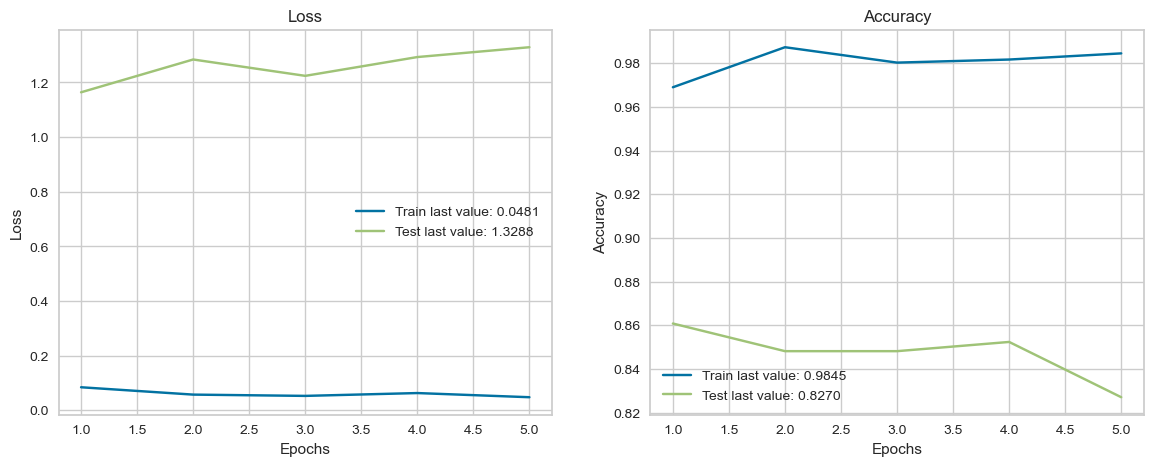

In [123]:
def plot_history(history, path):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label=f'Train last value: {history.history["loss"][-1]:.4f}')
    plt.plot(epochs, history.history['val_loss'], label=f'Test last value: {history.history["val_loss"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label=f'Train last value: {history.history["accuracy"][-1]:.4f}')
    plt.plot(epochs, history.history['val_accuracy'], label=f'Test last value: {history.history["val_accuracy"][-1]:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.savefig(path)
    plt.show()

# Exemple d'utilisation
plot_history(history1, path="standard.png")
plt.close()

### <a name="C28"><font color='DodgerBlue'> 4.7 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle VGG16)</a>

### <span style='background:PowderBlue'> Préparation des Images et du Dataset

In [127]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

In [129]:
train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

Found 946 files belonging to 12 classes.
Using 710 files for training.
Found 946 files belonging to 12 classes.
Using 236 files for validation.
Found 105 files belonging to 12 classes.


In [131]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

### <span style='background:PowderBlue'> Création du modèle

In [134]:
batch_size = 32
IMG_SIZE = 224

def dataset_fct(path, validation_split=0, data_type=None):
    dataset = tf.keras.utils.image_dataset_from_directory(
        path, labels='inferred', label_mode='categorical',
        class_names=None, batch_size=batch_size, image_size=(IMG_SIZE, IMG_SIZE), shuffle=True, seed=42,
        validation_split=validation_split, subset=data_type
    )
    return dataset

train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

# Déterminer le nombre de classes
num_classes = dataset_train.element_spec[1].shape[1]
print(f"Nombre de classes : {num_classes}")

def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

# Appliquer le prétraitement aux datasets
dataset_train = dataset_train.map(resize_and_rescale)
dataset_val = dataset_val.map(resize_and_rescale)
dataset_test = dataset_test.map(resize_and_rescale)

def create_VGG16_fct2(num_classes):
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Utiliser num_classes ici

    model = Model(inputs=input_tensor, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Création du modèle
with tf.device('/gpu:0'): 
    model3 = create_VGG16_fct2(num_classes)

# Création du callback
model3_save_path = "./model3_best_weights.keras"
checkpoint = ModelCheckpoint(model3_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

# Afficher le résumé du modèle
model3.summary()

# Entraîner le modèle
history = model3.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=50,  # Ajustez selon vos besoins
    callbacks=callbacks_list
)

Found 946 files belonging to 12 classes.
Using 710 files for training.
Found 946 files belonging to 12 classes.
Using 236 files for validation.
Found 105 files belonging to 12 classes.
Nombre de classes : 12


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,100 (56.64 MB)

 Trainable params: 134,412 (525.05 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1449 - loss: 2.5477
Epoch 1: val_loss improved from inf to 1.47738, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.1481 - loss: 2.5308 - val_accuracy: 0.6864 - val_loss: 1.4774
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4736 - loss: 1.5269
Epoch 2: val_loss improved from 1.47738 to 1.13032, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.4752 - loss: 1.5230 - val_accuracy: 0.7373 - val_loss: 1.1303
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5586 - loss: 1.2619
Epoch 3: val_loss improved from 1.13032 to 0.92705, saving model to ./model3_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.5594 - loss: 1.2599 - val_accuracy: 0.8008 - val_loss: 0.9271
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6693 - loss: 1.0720
Epoch 4: val_loss improved from 0.92705

### <span style='background:PowderBlue'> Scores

In [136]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model3.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8771 - loss: 0.3733
Training Accuracy   : 0.8901

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8368 - loss: 0.5739
Validation Accuracy :  0.8347


In [137]:
# Score de l'epoch optimal

model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8432
Test Accuracy       :  0.5048


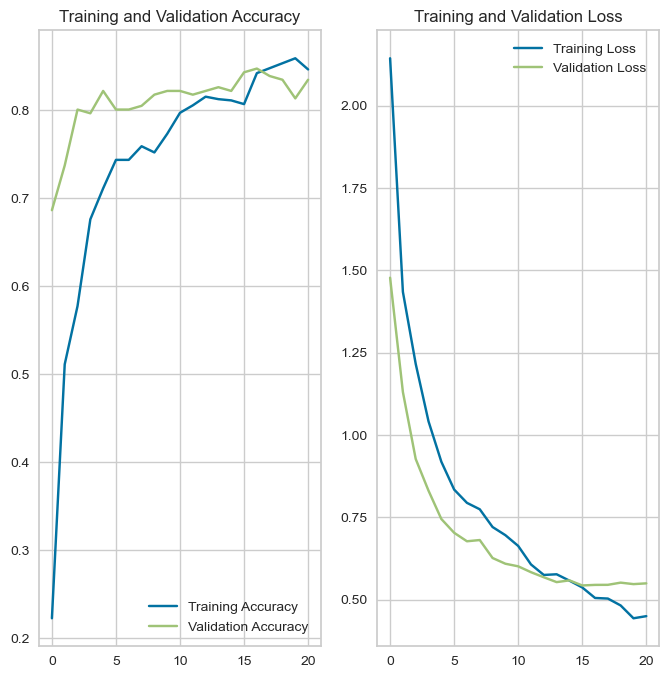

In [138]:
# Fonction pour afficher l'historique d'entraînement
def show_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Fonction pour sauvegarder l'historique d'entraînement
def plot_history(history, path="history.png"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.savefig(path)
    plt.close()

# Utilisation des fonctions définies
show_history(history)
plot_history(history, path="standard.png")

### <a name="C29"><font color='DodgerBlue'> 4.8 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle VGG19)</a>

### <span style='background:PowderBlue'> Création du modèle

In [142]:
# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_VGG19_fct()

# Création du callback
model4_save_path = "./model4_best_weights.keras"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,157,511 (76.89 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

None


In [144]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
def create_VGG19_fct():
    base_model = tf.keras.applications.VGG19(input_shape=(224, 224, 3),
                                             include_top=False,
                                             weights='imagenet')
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(12, activation='softmax')  # Assurez-vous que le nombre de sorties est 12
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

with tf.device('/gpu:0'): 
    model4 = create_VGG19_fct()

# Création du callback
model4_save_path = "./model4_best_weights.keras"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

with tf.device('/gpu:0'):
    history4 = model4.fit(dataset_train,
                          validation_data=dataset_val,
                          batch_size=batch_size,
                          epochs=50,
                          callbacks=callbacks_list,
                          verbose=1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2163 - loss: 2.0538
Epoch 1: val_loss improved from inf to 1.14032, saving model to ./model4_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.2201 - loss: 2.0431 - val_accuracy: 0.7161 - val_loss: 1.1403
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6031 - loss: 1.2201
Epoch 2: val_loss improved from 1.14032 to 0.83727, saving model to ./model4_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.6043 - loss: 1.2172 - val_accuracy: 0.8093 - val_loss: 0.8373
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6684 - loss: 0.9369
Epoch 3: val_loss improved from 0.83727 to 0.76239, saving model to ./model4_best_weights.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.6686 - loss: 0.9371 - val_accuracy: 0.7542 - val_loss: 0.7624
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7337 - loss: 0.8106
Epoch 4: val_loss improved from 0.76239

In [ ]:
model3.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy : {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy : {:.4f}".format(accuracy))

### <span style='background:PowderBlue'> Scores

In [ ]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

In [ ]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

In [ ]:
show_history(history4)
plot_history(history4, path="standard.png")
plt.close()

### <a name="C30"><font color='DodgerBlue'> 4.9 Nouvelle Approche avec Augmentation de Données Intégrée dans le Dataset pour l'Entraînement du Modèle (modèle ResNet50)</a>

### <span style='background:PowderBlue'> Création du modèle

In [ ]:
# Création du modèle
with tf.device('/gpu:0'): 
    model5 = create_ResNet50_fct()

# Création du callback
model5_save_path = "./model5_best_weights.h5"
checkpoint = ModelCheckpoint(model5_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'): 
    history5 = model5.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

### <span style='background:PowderBlue'> Scores

In [ ]:
# Score du dernier epoch

loss, accuracy = model5.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model5.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

In [ ]:
# Score de l'epoch optimal

model5.load_weights(model5_save_path)

loss, accuracy = model5.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model5.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

In [ ]:
show_history(history5)
plot_history(history5, path="standard.png")
plt.close()